In [19]:
import csv
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from math import sqrt, pi
from numpy import *

X=[]
Y=[]
with open('lab1.csv') as dat:
    data=csv.reader(dat)
    for lin in data:
        data1=" ".join(lin).split(" ")
        X.append(float(data1[0]))
        Y.append(float(data1[1]))

Аппроксимирующая функция

In [234]:
def f(x,a,b,c,g):
    return (x**2*a*cos(b*x)*(c*x**2+g))

Кусочно-линейная интерполяция

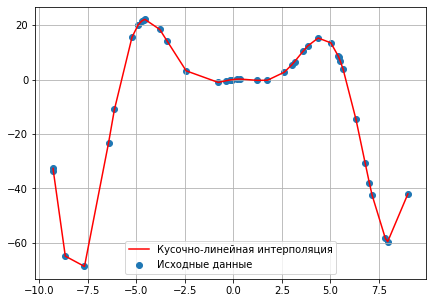

In [235]:
x_=zip(X,Y)
x_s = sorted(x_, key=lambda tup: tup[0])
X = [x_[0] for x_ in x_s]
Y = [x_[1] for x_ in x_s]
fig, gr = plt.subplots(1, 1, figsize=(7, 5))
gr.scatter(X, Y, label='Исходные данные')
gr.plot(X, Y,'r', label='Кусочно-линейная интерполяция')
gr.legend()
gr.grid()
plt.show()

Оптимальное решение:

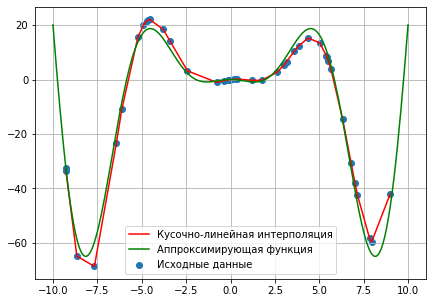

 a: 0.4507359400042198 
 b: 0.8056158256024275 
 c: 0.0012035816320836318 
 g: -2.3394098344277228


In [240]:
array_param=curve_fit(f, X, Y)[0]
array_x=linspace(-10,10,200)
array_y=f(array_x, array_param[0],array_param[1],array_param[2],array_param[3])
fig, gr = plt.subplots(1, 1, figsize=(7, 5))
gr.scatter(X, Y, label='Исходные данные')
gr.plot(X, Y,'r', label='Кусочно-линейная интерполяция')
gr.plot(array_x, array_y,'g', label='Аппроксимирующая функция')
gr.legend()
gr.grid()
plt.show()
print(" a:",array_param[0],'\n',"b:",array_param[1],'\n',"c:",array_param[2],'\n', "g:",array_param[3])

In [237]:
err=0
for i in range(len(X)):
    err+=(Y[i] - f(X[i],array_param[0],array_param[1],array_param[2],array_param[3])) ** 2
itog_err=sqrt(err/len(X))
print("Среднеквадратичная погрешность:", itog_err)
pogr = max([abs(Y[i] - f(X[i],array_param[0],array_param[1],array_param[2],array_param[3])) for i in range(len(X))])
print("Максимальная погрешность:",pogr)

Среднеквадратичная погрешность: 2.9384612429992956
Максимальная погрешность: 8.874505049776324
